In [2]:
import sys
import jmespath

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd 

import fiostats

plt.style.use('ggplot')

# Ten clients write to a single OST

In [3]:
data = fiostats.read_test_sequence("many_writer/20190429T125251")
# print(jmespath.search('[*].jobs[*]."job options"', data))
bw = jmespath.search('[*].jobs[*].write.bw_mean', data)
bw = np.array([ x[0] for x in bw])
bw /= 1024.
print("Bandwith per client:", bw)
print("Total Bandwidth:", bw.sum())

Found for many_writer/20190429T125251 10 tests
Bandwith per client: [895.69470989 842.00876696 840.94345763 847.52388433 844.72540031
 855.38652262 884.42848688 877.0480716  876.94812483 895.82204933]
Total Bandwidth: 8660.529474387695


# Bandwith for many clients writing to a single OST

In [4]:
# read data for 1, 2, 4 and 10 client nodes (single process/client, the 10 clients is a repeat of the result above)
dall = []
for date in ('20190429T133618', '20190429T134050', '20190429T134534', '20190429T135021'):
    dall.append(fiostats.read_test_sequence("many_writer/{}".format(date)))

Found for many_writer/20190429T133618 1 tests
Found for many_writer/20190429T134050 2 tests
Found for many_writer/20190429T134534 4 tests
Found for many_writer/20190429T135021 10 tests


In [21]:
c = []
for d in dall:
    bw = jmespath.search('[*].jobs[*].write.bw_mean', d)
    nt = len(bw)
    for test in bw:
        c.append((nt, test[0]/1024.))
df = pd.DataFrame(data=c, columns=('nc', 'bw'))
grp = df.groupby('nc')
for res in jmespath.search('[*][*].jobs[*]."job options".directory',dall):
    print(res)

[['/ffb01/wktst/tests/s1o5/drp-tst-dev013']]
[['/ffb01/wktst/tests/s1o5/drp-tst-dev013'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev017']]
[['/ffb01/wktst/tests/s1o5/drp-tst-dev019'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev010'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev017'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev013']]
[['/ffb01/wktst/tests/s1o5/drp-tst-dev018'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev014'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev013'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev016'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev011'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev010'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev017'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev012'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev019'], ['/ffb01/wktst/tests/s1o5/drp-tst-dev015']]


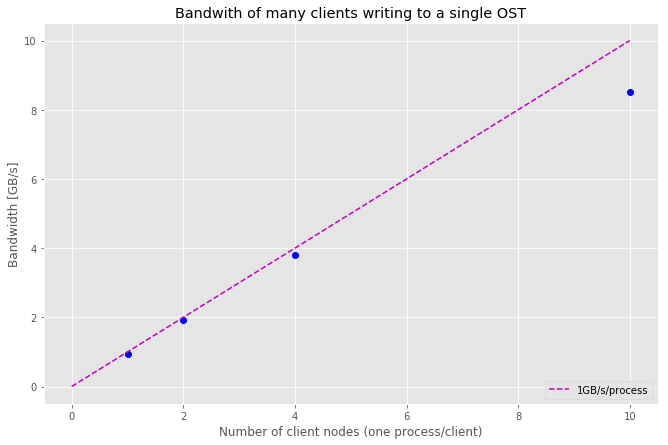

In [23]:
fig = plt.figure(figsize=(11,7))
plt.plot(grp.sum()/1024., 'ob')
plt.xlabel('Number of client nodes (one process/client)')
plt.ylabel('Bandwidth [GB/s]')
plt.plot([0, 10], [0, 10], 'm--', label="1GB/s/process")
plt.legend(loc=4)
_ = plt.title("Bandwith of many clients writing to a single OST")

In [7]:
## Rate for a each client.

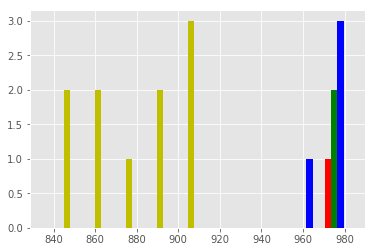

In [8]:
cl = ('r', 'g', 'b', 'y')
pl = []
for nc, group in grp:    
    x = group.iloc[:,1].values
    pl.append(x)   
_ = plt.hist(pl, color=cl)    

# Many clients writing to many osts
The number of client nodes was varied. Each client ran four processes and the writing was spread over all eight OSTs. 
The path __/ffb01/wktst/tests/all/__ was used which has a stripe count of one and no stripe index set (lustre selects the OSTs).

In [22]:
# data for 1, 2, 4 and 10 client nodes (four processes/client)
d2 = []
for date in ('20190429T155313', '20190429T155816', '20190429T160319', '20190429T160953'):
    d2.append(fiostats.read_test_sequence("many_writer/{}".format(date)))
    
for res in jmespath.search('[*][*].jobs[*]."job options".directory',d2):
    print(res)

Found for many_writer/20190429T155313 1 tests
Found for many_writer/20190429T155816 2 tests
Found for many_writer/20190429T160319 4 tests
Found for many_writer/20190429T160953 10 tests
[['/ffb01/wktst/tests/all/s1o1/drp-tst-dev013', '/ffb01/wktst/tests/all/s1o2/drp-tst-dev013', '/ffb01/wktst/tests/all/s1o3/drp-tst-dev013', '/ffb01/wktst/tests/all/s1o4/drp-tst-dev013']]
[['/ffb01/wktst/tests/all/s1o1/drp-tst-dev017', '/ffb01/wktst/tests/all/s1o2/drp-tst-dev017', '/ffb01/wktst/tests/all/s1o3/drp-tst-dev017', '/ffb01/wktst/tests/all/s1o4/drp-tst-dev017'], ['/ffb01/wktst/tests/all/s1o1/drp-tst-dev013', '/ffb01/wktst/tests/all/s1o2/drp-tst-dev013', '/ffb01/wktst/tests/all/s1o3/drp-tst-dev013', '/ffb01/wktst/tests/all/s1o4/drp-tst-dev013']]
[['/ffb01/wktst/tests/all/s1o1/drp-tst-dev019', '/ffb01/wktst/tests/all/s1o2/drp-tst-dev019', '/ffb01/wktst/tests/all/s1o3/drp-tst-dev019', '/ffb01/wktst/tests/all/s1o4/drp-tst-dev019'], ['/ffb01/wktst/tests/all/s1o1/drp-tst-dev017', '/ffb01/wktst/tests/a

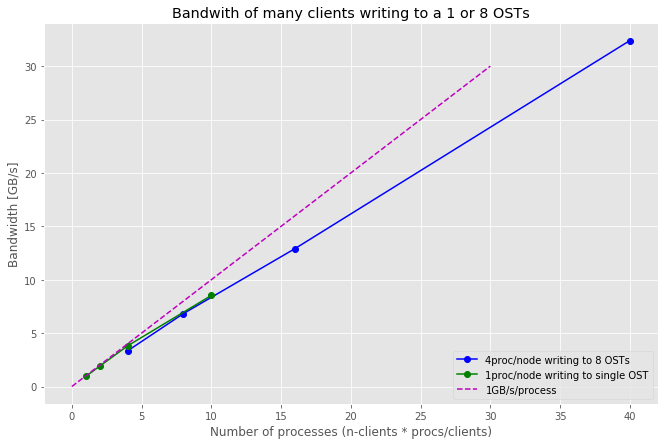

In [28]:
c = []
for d in d2:
    bw = jmespath.search('[*].jobs[*].write.bw_mean', d)
    bw_flatten = [ x for test in bw for x in test]
    nt = len(bw_flatten)
    for test in bw_flatten:
        c.append((nt, test/1024.))
df = pd.DataFrame(data=c, columns=('nc', 'bw'))
grp4 = df.groupby('nc')

fig = plt.figure(figsize=(11,7))
plt.plot(grp4.sum()/1024., 'ob-', label="4proc/node writing to 8 OSTs")
plt.plot(grp.sum()/1024., 'og-', label="1proc/node writing to single OST")

plt.xlabel('Number of processes (n-clients * procs/clients)')
plt.ylabel('Bandwidth [GB/s]')
plt.plot([0, 30], [0, 30], 'm--', label="1GB/s/process")
plt.legend(loc=4)
_ = plt.title("Bandwith of many clients writing to a 1 or 8 OSTs")
plt.savefig("pics/multiple_node_wbw.png")